In [ ]:
# Time Series Manipulation

In [ ]:
# Keywords
time series, manipulation

In [ ]:
# Refrences
[Every Pandas Function to Manipulate Time Series](https://towardsdatascience.com/every-pandas-function-you-can-should-use-to-manipulate-time-series-711cb0c5c749)
[Kagge Every Pandas Function to Manipulate Time Series](Every Pandas Functionhttps://www.kaggle.com/bextuychiev/every-pandas-function-to-manipulate-time-series)

In [1]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
# settings
import warnings
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["legend.fontsize"] = "small"

#pd.set_option("precision", 2)
warnings.filterwarnings("ignore")

In [ ]:
##  Importing time series data

In [ ]:
# Basic date and time functions in Pandas

In [4]:
# load data

# path = 'e:\PycharmProjects\TimeSeries'
path = os.path.abspath(os.getcwd())

# load apple, google data 
apple_google_file = 'apple_google.csv'
path_to_apple_google_file = os.path.join(path, 'data', apple_google_file)
aapl_googl = pd.read_csv(path_to_apple_google_file, parse_dates=["Date"],index_col="Date",).dropna()

# load S&P500 stock prices
sp500_file = 'sp500.csv'
path_to_sp500_file = os.path.join(path, 'data', sp500_file)
sp500 = pd.read_csv(
    path_to_sp500_file,
    parse_dates=["date"],
    index_col="date",
)

Load data notes
When using the pd.read_csv function to import time series, there are 2 arguments you should always use -
parse_dates and index_col

parse_dates converts date-like strings to DateTime objects and index_col sets the passed column as the index. This operation is the basis for all time-series manipulation you will do with Pandas.

When you don't know which column contains dates upon importing, you can perform the date conversion using pd.to_datetime function afterward.


In [5]:
sp500.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [ ]:
# make the conversion if needed - no needed it was done in the pd.read_csv

# It is in the format "%Y-%m-%d" (full list of datetime format strings can be found here). Pass this to pd.to_datetime:
# Passing a format string to pd.to_datetime significantly speeds up the conversion for large datasets. Set errors to "coerce" to mark invalid dates as NaT (not a date, i.e. - missing).
# After conversion, set the DateTime column as index (a strict requirement for best time series analysis):
# sp500["date"] = pd.to_datetime(sp500["date"], format="%Y-%m-%d", errors="coerce")

# Check if the conversion is successful
assert sp500["date"].dtype == "datetime64[ns]"
sp500.set_index("date", inplace=True)

In [ ]:
## 1.2 Pandas TimeStamp

In [17]:
stamp = pd.Timestamp("2020/12/26")  # You can pass any date-like string
stamp

Timestamp('2020-12-26 00:00:00')

In [18]:
# Full timestamp attributes

attributes = [
    ".year",
    ".month",
    ".quarter",
    ".day",
    ".hour",
    ".minute",
    ".second",
    ".weekday()",
    ".dayofweek",
    ".weekofyear",
    ".dayofyear",
]


pd.DataFrame(
    {
        "Attribute": attributes,
        "'2022-01-05 11:56:57'": [
            eval(f"stamp{attribute}") for attribute in attributes
        ],
    }
)

,Attribute,'2022-01-05 11:56:57'
0,.year,2020
1,.month,12
2,.quarter,4
3,.day,26
4,.hour,0
5,.minute,0
6,.second,0
7,.weekday(),5
8,.dayofweek,5
9,.weekofyear,52


In [8]:
## 1.3 Sequence of dates

index = pd.date_range(start="2010-10-10", end="2020-10-10", freq="D")
print(index)

# Another way to create date ranges is passing the start date and telling how many periods you want, and specifying 
# the frequency:
print(pd.date_range(start="2022-01-01", periods=5, freq="7S"))

# Most frequently used aliases
aliases = ["B", "D", "W", "M", "BM", "MS", "Q", "H", "A, Y"]
values = [
    "Business days",
    "Calendar days",
    "Weekly",
    "Month end frequency",
    "Business month end frequency",
    "Month start frequency",
    "Quarterly",
    "Hourly",
    "Year end",
]

pd.DataFrame({"Frequency Alias": aliases, "Definition": values})

# It is also possible to pass custom frequencies such as "1h30min", "5D", "2W", etc. 


DatetimeIndex(['2010-10-10', '2010-10-11', '2010-10-12', '2010-10-13',
               '2010-10-14', '2010-10-15', '2010-10-16', '2010-10-17',
               '2010-10-18', '2010-10-19',
               ...
               '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10'],
              dtype='datetime64[ns]', length=3654, freq='D')
DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 00:00:07',
               '2022-01-01 00:00:14', '2022-01-01 00:00:21',
               '2022-01-01 00:00:28'],
              dtype='datetime64[ns]', freq='7S')


,Frequency Alias,Definition
0,B,Business days
1,D,Calendar days
2,W,Weekly
3,M,Month end frequency
4,BM,Business month end frequency
5,MS,Month start frequency
6,Q,Quarterly
7,H,Hourly
8,"A, Y",Year end


In [9]:
# create random dates in a time range
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2018-01-01')
random_dates(start, end)

DatetimeIndex(['2015-08-19 07:27:14', '2017-03-17 14:07:07',
               '2015-11-01 07:06:17', '2016-02-17 12:59:17',
               '2016-12-08 02:54:31', '2015-01-06 02:32:21',
               '2016-08-12 01:10:48', '2017-02-19 09:32:28',
               '2016-02-09 18:54:48', '2015-01-30 16:13:09'],
              dtype='datetime64[ns]', freq=None)

In [10]:
## 1.4 Slicing
# Slicing time series data can be very intuitive if the index is a DateTimeIndex. You can use something called partial 
# slicing:

print(aapl_googl["2010":"2015"].sample(4))
print(aapl_googl.loc["2012-10-10":"2012-12-10", "GOOG"].head())

             AAPL    GOOG
Date                     
2011-02-15  51.41  311.76
2013-08-29  70.24  427.29
2010-12-29  46.47  300.20
2012-09-11  94.37  345.75
Date
2012-10-10    371.91
2012-10-11    375.36
2012-10-12    372.00
2012-10-15    370.12
2012-10-16    371.98
Name: GOOG, dtype: float64


In [ ]:
# 2. Missing data imputation and interpolation

Missing data is ubiquitous no matter the type of the dataset. This section is all about imputing it in the context of time series.

    You may also hear it called interpolation of missing data in time series lingo.

Besides the basic mean, median and mode imputation, some of the most common techniques include:

    Forward filling
    Backward filling
    Intermediate imputations with pd.interpolate

We will also discuss model-based imputation such as KNN imputing. Moreover, we will explore visual methods of comparing the efficiency of the techniques and choose the one that best fits the underlying distribution.

In [ ]:
## 2.1 Mean, median and mode interpolation



In [11]:
# randomly select data points in Apple/Google stock dataset and convert them to NaN:

# choose 200 random
random_indices = np.random.choice([_ for _ in range(len(aapl_googl))], size=200)

# Mark the indices as missing
clone = aapl_googl.copy(deep=True).drop("AAPL", axis=1)
clone.iloc[random_indices, 0] = np.nan

In [13]:
#  plots the original distribution before and after an imputation(s) is performed:

def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=5, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=3, label=key, ax=ax)

    plt.legend()
    plt.show();

In [14]:
# impute using SimpleImputer multiple methods
from sklearn.impute import SimpleImputer

for method in ["mean", "median", "most_frequent"]:
    clone[method] = SimpleImputer(strategy=method).fit_transform(
        clone["GOOG"].values.reshape(-1, 1)
    )

In [15]:
clone["GOOG"].sample(2)

Date
2014-05-19    528.86
2013-12-31    559.79
Name: GOOG, dtype: float64

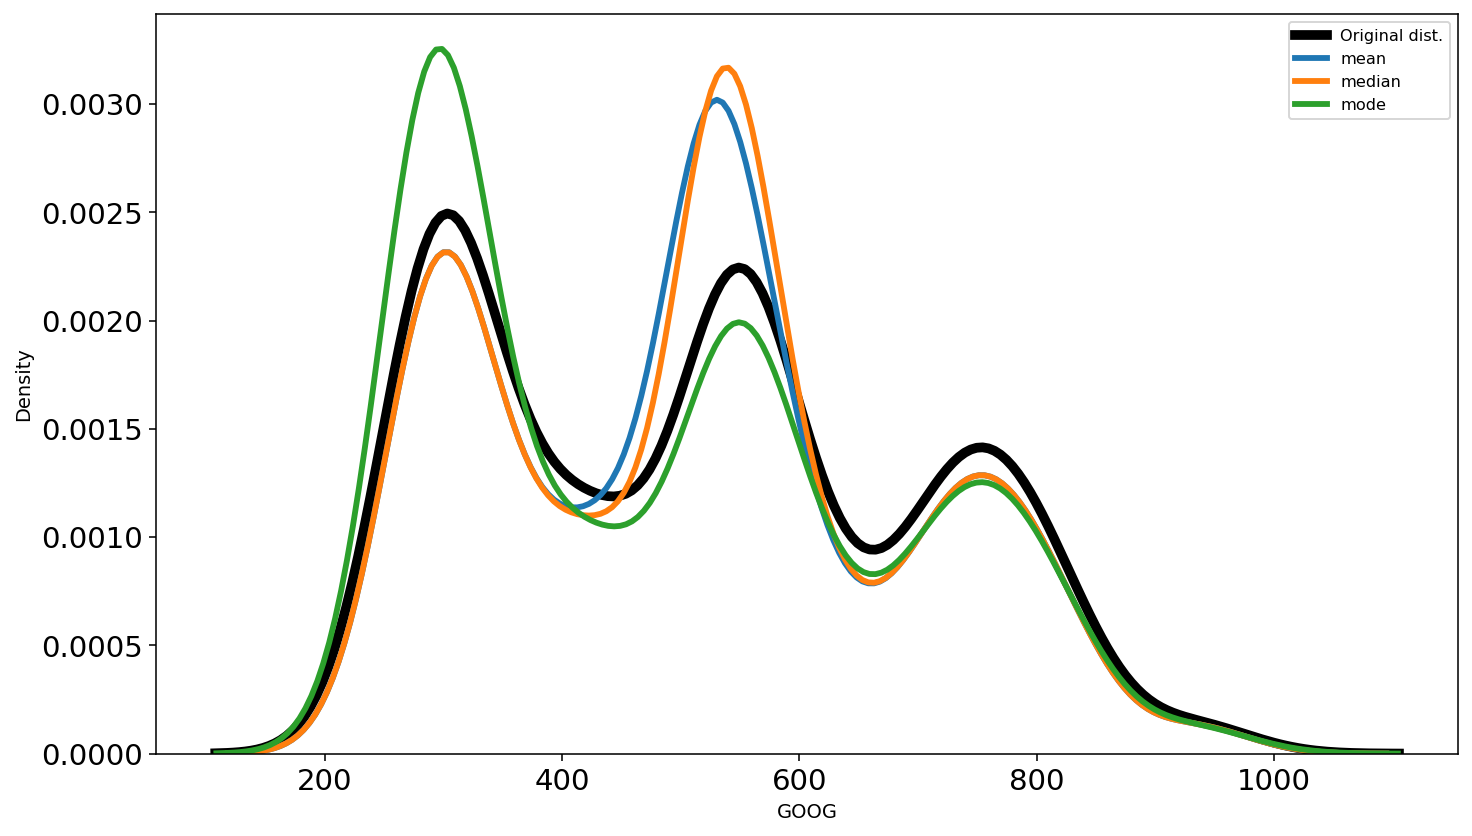

In [16]:
# plot the original GOOG distribution against the 3 imputed features we just created
compare_dists(
    clone["GOOG"],
    {"mean": clone["mean"], "median": clone["median"], "mode": clone["most_frequent"]},
)

In [ ]:
# going forward with the blue line
clone.drop(["mean", "median", "most_frequent"], axis=1, inplace=True)

In [ ]:
## 2.2 Forward and backward filling


In [48]:
# Consider this small distribution:

sample = pd.Series([np.nan, 2, 3, np.nan, 4, np.nan, np.nan, 5, 12, np.nan]).to_frame(
    name="original"
)
print(sample)

# apply forward a backward filling
sample["ffill"] = sample["original"].ffill()
sample["bfill"] = sample["original"].bfill()
print(sample)



   original
0       NaN
1       2.0
2       3.0
3       NaN
4       4.0
5       NaN
6       NaN
7       5.0
8      12.0
9       NaN
   original  ffill  bfill
0       NaN    NaN    2.0
1       2.0    2.0    2.0
2       3.0    3.0    3.0
3       NaN    3.0    4.0
4       4.0    4.0    4.0
5       NaN    4.0    5.0
6       NaN    4.0    5.0
7       5.0    5.0    5.0
8      12.0   12.0   12.0
9       NaN   12.0    NaN


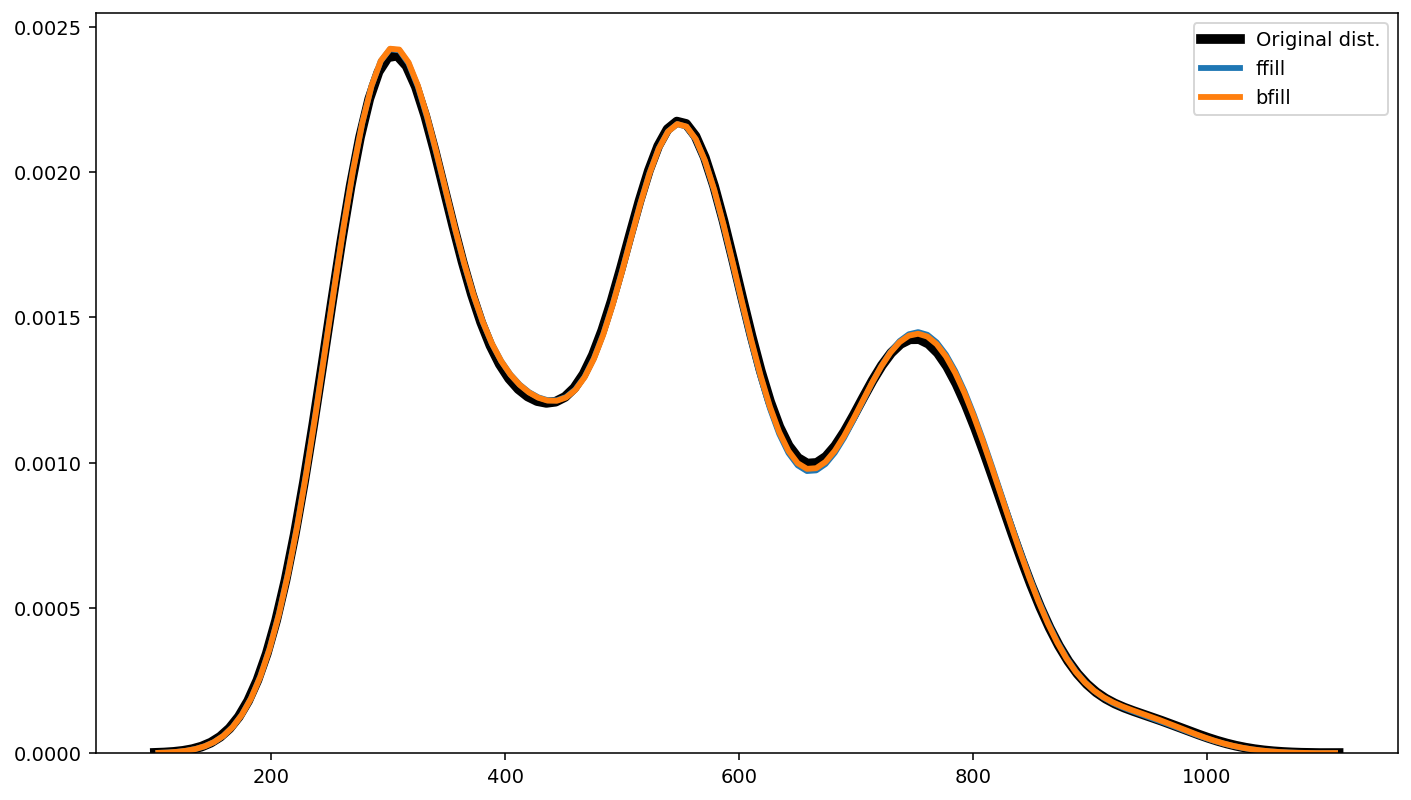

In [49]:
# apply forward, backward method to clone 
for method in ["ffill", "bfill"]:
    clone[method] = eval(f"clone['GOOG'].{method}()")

compare_dists(clone["GOOG"], {"ffill": clone["ffill"], "bfill": clone["bfill"]})

In [ ]:
## 2.3 Using pd.interpolate

Pandas provides a whole suite of other statistical imputation techniques in pd.interpolate function. Its method parameter accepts the name of the technique as a string.

The most popular ones are 'linear' and 'nearest,' but you can see the full list from the function's documentation. Here, we will only discuss those two.

In [51]:
# create a small distribution
sample = pd.Series([1] + [np.nan] * 6 + [10]).to_frame(name="original")
print(sample)

# assign the methods
sample["linear"] = sample.original.interpolate(method="linear")
sample["nearest"] = sample.original.interpolate(method="nearest")

print(sample)

   original
0       1.0
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7      10.0
   original     linear  nearest
0       1.0   1.000000      1.0
1       NaN   2.285714      1.0
2       NaN   3.571429      1.0
3       NaN   4.857143      1.0
4       NaN   6.142857     10.0
5       NaN   7.428571     10.0
6       NaN   8.714286     10.0
7      10.0  10.000000     10.0


In [ ]:
## 2.4 Model based imputation with KNN


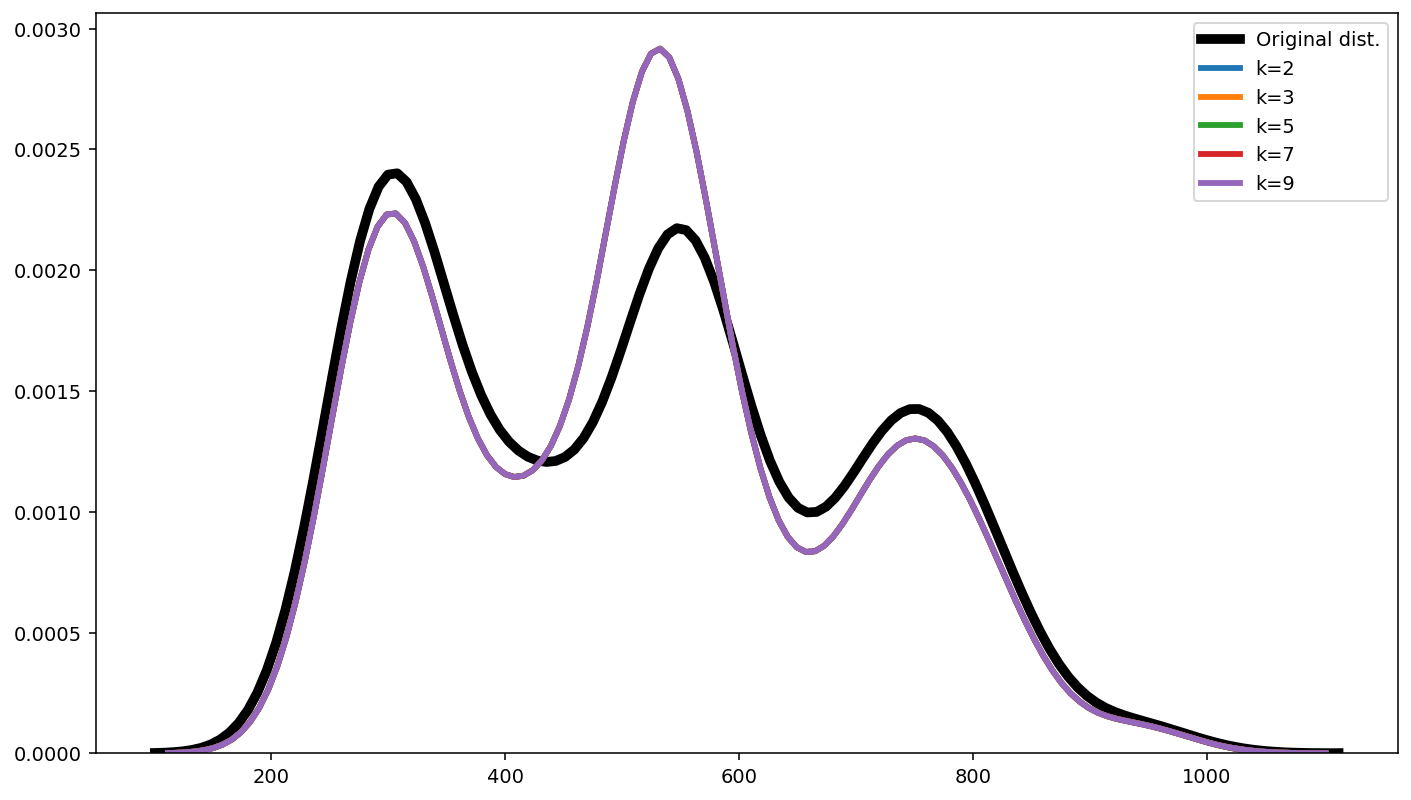

              GOOG    mean  median  most_frequent   ffill   bfill     k=2  \
Date                                                                        
2010-12-16  295.56  295.56  295.56         295.56  295.56  295.56  295.56   
2010-12-17  295.10  295.10  295.10         295.10  295.10  295.10  295.10   
2010-12-20  297.23  297.23  297.23         297.23  297.23  297.23  297.23   
2010-12-21  301.23  301.23  301.23         301.23  301.23  301.23  301.23   
2010-12-22  302.44  302.44  302.44         302.44  302.44  302.44  302.44   
...            ...     ...     ...            ...     ...     ...     ...   
2017-05-24  954.96  954.96  954.96         954.96  954.96  954.96  954.96   
2017-05-25  969.54  969.54  969.54         969.54  969.54  969.54  969.54   
2017-05-26  971.47  971.47  971.47         971.47  971.47  971.47  971.47   
2017-05-30  975.88  975.88  975.88         975.88  975.88  975.88  975.88   
2017-05-31  964.86  964.86  964.86         964.86  964.86  964.86  964.86   

In [53]:
# The most important parameter of KNN is k - the number of neighbors. We will apply the technique to Apple/Google 
# data with several values of k and find the best one the same way as we did in the previous sections:

from sklearn.impute import KNNImputer

n_neighbors = [2, 3, 5, 7, 9]

for k in n_neighbors:
    imp = KNNImputer(n_neighbors=k)
    clone[f"k={k}"] = imp.fit_transform(clone["GOOG"].values.reshape(-1, 1))

compare_dists(clone["GOOG"], {f"k={k}": clone[f"k={k}"] for k in n_neighbors})
print(clone)

In [ ]:
# 3. Basic time series calculations
These are called shifts, lags, and something called a percentage change.

In [ ]:
## 3.1 Shifts and lags


              SP500  lagged_1  diff_lag  shifted_1  shifted_2
date                                                         
2007-06-29  1503.35   1519.43     16.08        NaN        NaN
2007-07-02  1519.43   1524.87      5.44    1503.35        NaN
2007-07-03  1524.87   1525.40      0.53    1519.43    1503.35
2007-07-05  1525.40   1530.44      5.04    1524.87    1519.43
2007-07-06  1530.44   1531.85      1.41    1525.40    1524.87
2007-07-09  1531.85   1510.12    -21.73    1530.44    1525.40
              SP500  lagged_1  diff_lag  lagged_2
date                                             
2016-12-22  2260.96   2263.79      2.83   2268.88
2016-12-23  2263.79   2268.88      5.09   2249.92
2016-12-27  2268.88   2249.92    -18.96   2249.26
2016-12-28  2249.92   2249.26     -0.66   2238.83
2016-12-29  2249.26   2238.83    -10.43       NaN
2016-12-30  2238.83       NaN       NaN       NaN
              SP500  lagged_1  diff_lag
date                                   
2007-06-29  1503.35   15

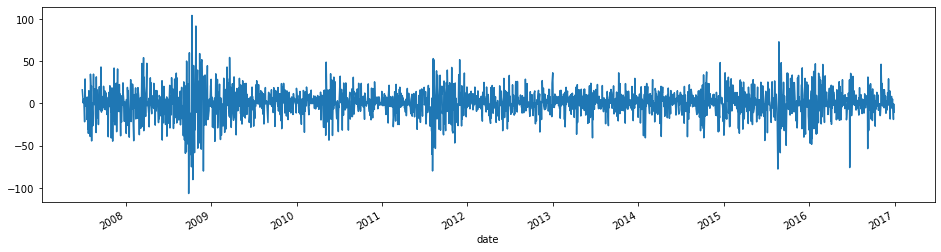

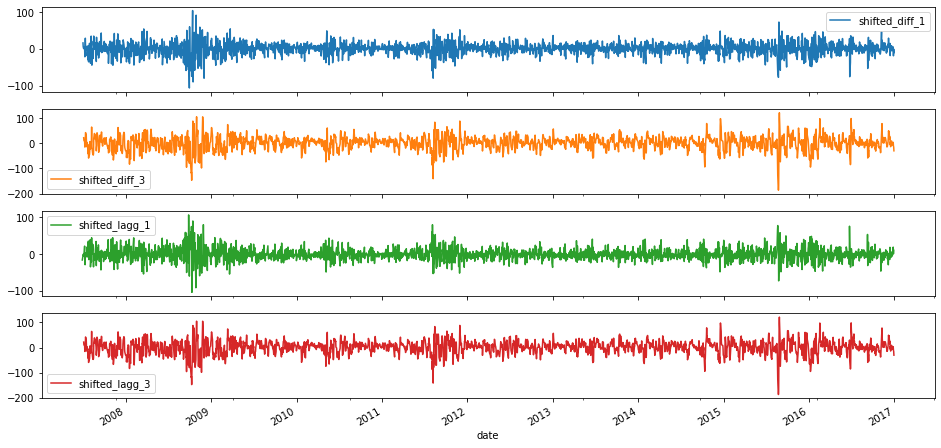

In [59]:
# operation in time series is to move all data points one or more periods backward or forward to compare past and 
# future values

sp500["shifted_1"] = sp500["SP500"].shift(periods=1)  # the default
sp500["shifted_2"] = sp500["SP500"].shift(periods=2)

print(sp500.head(6))

# Shifting forward enables to compare the current data point to those recorded one or more periods before.
# sfifting backward - lagging 
sp500.drop(["shifted_1", "shifted_2"], axis=1, inplace=True)

sp500["lagged_1"] = sp500["SP500"].shift(periods=-1)
sp500["lagged_2"] = sp500["SP500"].shift(periods=-2)

print(sp500.tail(6))

# A common operation after shifting or lagging is finding the difference and plotting it.

sp500.drop("lagged_2", axis=1, inplace=True)

sp500["diff_lag"] = sp500["lagged_1"] - sp500["SP500"]
print(sp500.head())

sp500["diff_lag"].plot(figsize=(16, 4))

# using pandas diff function
sp500.drop(["lagged_1", "diff_lag"], axis=1, inplace=True)

sp500["shifted_diff_1"] = sp500["SP500"].diff(periods=1)
sp500["shifted_diff_3"] = sp500["SP500"].diff(periods=3)
sp500["shifted_lagg_1"] = sp500["SP500"].diff(periods=-1)
sp500["shifted_lagg_3"] = sp500["SP500"].diff(periods=3)

sp500.drop("SP500", axis=1).plot(figsize=(16, 8), subplots=True);

In [ ]:
# 3.2  Percentage changes

In [62]:
# common metric that can be derived from time-series data is day-to-day percentage change

#sp500.drop(
#    ["shifted_diff_1", "shifted_diff_3", "shifted_lagg_1", "shifted_lagg_3"],
#    axis=1,
#    inplace=True,
#)

sp500["shifted"] = sp500["SP500"].shift(1)
sp500["change"] = sp500["SP500"].div(sp500["shifted"]).sub(1).mul(100)

print(sp500.head())

#To calculate day-to-day percentage change, shift one period forward and divide the original distribution by the 
#shifted one and subtract 1. The resulting values are given as proportions of what they were the day before.

sp500["pct_change"] = sp500["SP500"].pct_change().mul(100)

print(sp500.head())

              SP500  shifted    change
date                                  
2007-06-29  1503.35      NaN       NaN
2007-07-02  1519.43  1503.35  1.069611
2007-07-03  1524.87  1519.43  0.358029
2007-07-05  1525.40  1524.87  0.034757
2007-07-06  1530.44  1525.40  0.330405
              SP500  shifted    change  pct_change
date                                              
2007-06-29  1503.35      NaN       NaN         NaN
2007-07-02  1519.43  1503.35  1.069611    1.069611
2007-07-03  1524.87  1519.43  0.358029    0.358029
2007-07-05  1525.40  1524.87  0.034757    0.034757
2007-07-06  1530.44  1525.40  0.330405    0.330405


In [ ]:
# 4. Resampling


In [ ]:
 # increase or decrease the granularity of time series to generate new insights. These operations are called resampling
 # or changing the frequency of time series



In [ ]:
 ## 4.1 Changing the frequency with asfreq

In [67]:
# The SP500 stocks data does not have a fixed date frequency, i.e., the period difference between each date is not 
# the same:
print(sp500.head())

# calendar day frequency (daily):
print(sp500.asfreq("D").head(7))

# 5-hour frequency
print(sp500.asfreq("5h").head(7))  # This makes the dataset very large

#
# 10 day frequency with interpolation
print(sp500.asfreq("10d", method="ffill").head(7))  # This makes the dataset smaller

              SP500  shifted    change  pct_change
date                                              
2007-06-29  1503.35      NaN       NaN         NaN
2007-07-02  1519.43  1503.35  1.069611    1.069611
2007-07-03  1524.87  1519.43  0.358029    0.358029
2007-07-05  1525.40  1524.87  0.034757    0.034757
2007-07-06  1530.44  1525.40  0.330405    0.330405
              SP500  shifted    change  pct_change
date                                              
2007-06-29  1503.35      NaN       NaN         NaN
2007-06-30      NaN      NaN       NaN         NaN
2007-07-01      NaN      NaN       NaN         NaN
2007-07-02  1519.43  1503.35  1.069611    1.069611
2007-07-03  1524.87  1519.43  0.358029    0.358029
2007-07-04      NaN      NaN       NaN         NaN
2007-07-05  1525.40  1524.87  0.034757    0.034757
                       SP500  shifted  change  pct_change
date                                                     
2007-06-29 00:00:00  1503.35      NaN     NaN         NaN
2007-06-29

In [73]:
## 4.2 Downsampling with resample and aggregating

# powerful alternative is resample which behaves like pd.groupby. Just like groupby groups the data based on 
# categorical values, resample groups the data by date frequencies
aapl_googl.resample("M")

# Since downsampling decreases the number of data points, we need an aggregation function like mean, median, or mode:
print(aapl_googl.resample("M").mean().tail())

# returns the first, last day of the group
# Resample with business-month frequency
# and return the first record of each group
print(aapl_googl.resample("BM").first().tail())

# Opposite of first()
print(aapl_googl.resample("Y").last().tail())  # Year-end frequency

#multiple aggregating functions
print(aapl_googl.resample("Y").agg(["mean", "median", "std"]).head())

                  AAPL        GOOG
Date                              
2017-01-31  119.570000  807.905000
2017-02-28  133.713684  816.916842
2017-03-31  140.617826  834.111304
2017-04-30  142.886842  844.056842
2017-05-31  152.227727  939.284091
              AAPL    GOOG
Date                      
2017-01-31  116.15  786.14
2017-02-28  128.75  795.70
2017-03-31  139.79  835.24
2017-04-28  143.70  838.55
2017-05-31  146.58  912.57
              AAPL    GOOG
Date                      
2013-12-31   80.15  559.79
2014-12-31  110.38  526.40
2015-12-31  105.26  758.88
2016-12-31  115.82  771.82
2017-12-31  152.76  964.86
                 AAPL                           GOOG                    
                 mean  median        std        mean   median        std
Date                                                                    
2010-12-31  46.217273  46.240   0.238918  299.040000  299.160   2.554451
2011-12-31  52.000357  51.005   3.703047  284.206190  288.435  21.401861
2012-12-31  

In [ ]:
## 4.3 Upsampling with resample and interpolating

In [74]:
# opposite of downsampling making the DateTime more granular, need of imputation

# Resample with business day freq and forward-fill
print(aapl_googl.resample("B").ffill().tail())

# Resample with 20-hour frequency and back-fill
print(aapl_googl.resample("20h").bfill().sample(5))

              AAPL    GOOG
Date                      
2017-05-25  153.87  969.54
2017-05-26  153.61  971.47
2017-05-29  153.61  971.47
2017-05-30  153.67  975.88
2017-05-31  152.76  964.86
                       AAPL    GOOG
Date                               
2011-06-19 00:00:00   45.05  242.05
2016-02-14 16:00:00   96.64  691.00
2015-10-10 04:00:00  111.60  646.67
2015-02-06 08:00:00  119.72  527.83
2013-06-16 08:00:00   61.71  442.68


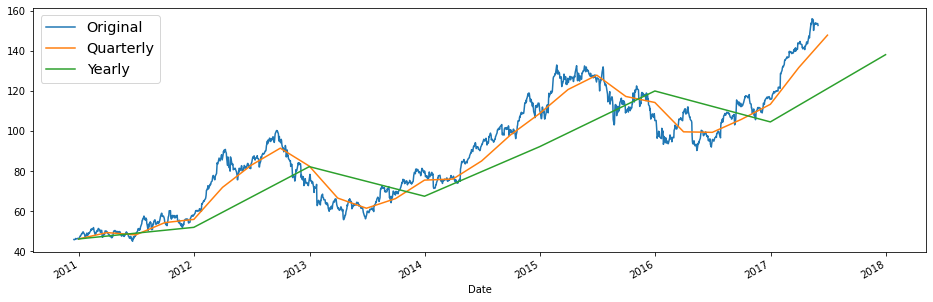

In [77]:
## 4.4 Plotting the resampled data

# new trends and patterns when you downsample. This is because downsampling reduces the granularity, 
# thus eliminating noise

quarter_google = aapl_googl.resample("Q")["GOOG"].mean()
yearly_google = aapl_googl.resample("Y")["GOOG"].mean()

quarter_apple = aapl_googl.resample("Q")["AAPL"].mean()
yearly_apple = aapl_googl.resample("Y")["AAPL"].mean()

# Plot Apple's downsampled stocks
aapl_googl["AAPL"].plot(figsize=(16, 5), label="Original")
quarter_apple.plot(label="Quarterly")
yearly_apple.plot(label="Yearly")
plt.legend(fontsize="x-large");


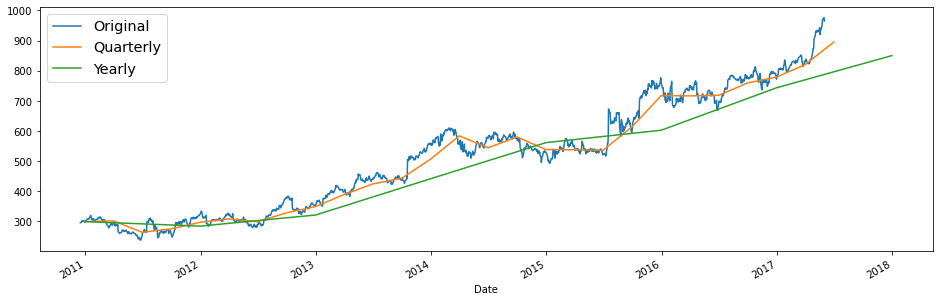

In [78]:
# Plot Google's downsampled stocks
aapl_googl["GOOG"].plot(figsize=(16, 5), label="Original")
quarter_google.plot(label="Quarterly")
yearly_google.plot(label="Yearly")
plt.legend(fontsize="x-large");

# Plotting the upsampled distribution is only going to introduce more noise, so we won't do it here.

In [ ]:
# 5. Comparinfg the growth of multiple time series 

AAPL     89.465209
GOOG    513.967180
dtype: float64


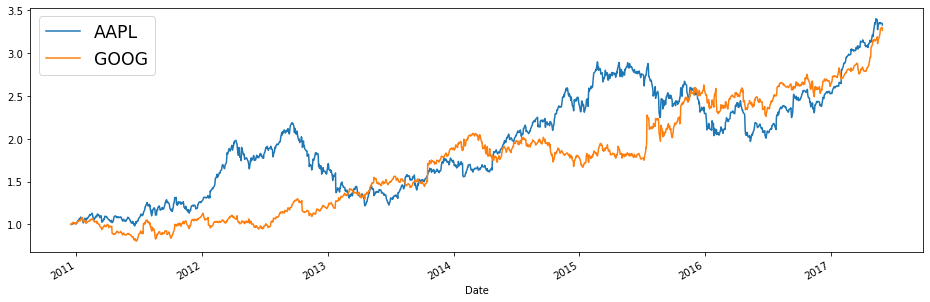

In [81]:
# to compare two or more numeric values that change over time. 
# For example, we might want to see the growth rate of Google and Apple's stock prices. 
# But here is the problem:
print(aapl_googl.mean())

# Google's stock prices are way higher than Apple's. Plotting the stocks together would probably squish Apple's 
# to a flat line. In other words, the two stocks have different scales.
# To fix this, statisticians use normalization. The most common variation is choosing the first recorded value and 
# dividing the rest of the samples by that amount. This shows how each record changes compared to the first.
aapl_googl.dropna(inplace=True)

# The first rows will contain ones because
# they are being divided by themselvs
aapl_googl.div(aapl_googl.iloc[0]).head(10)

# The above output shows that for the first 3 dates, Apple stocks didn't change. Then, it increased by 1% of what it was 
# on the first date ('2010–12–16'). Google's prices are more volatile, fluctuating between 1 and 2% increases during the 
# first 10 dates.

# Normalize
normalized_aapl_goog = aapl_googl.div(aapl_googl.iloc[0])

normalized_aapl_goog.plot(figsize=(16, 5))
plt.legend(fontsize="xx-large");

# Both Apple's and Google's achieved over 300% growth from 2011 to 2017. This plot may be even more interesting if we 
# compare their growth to other 500 Fortune Companies:

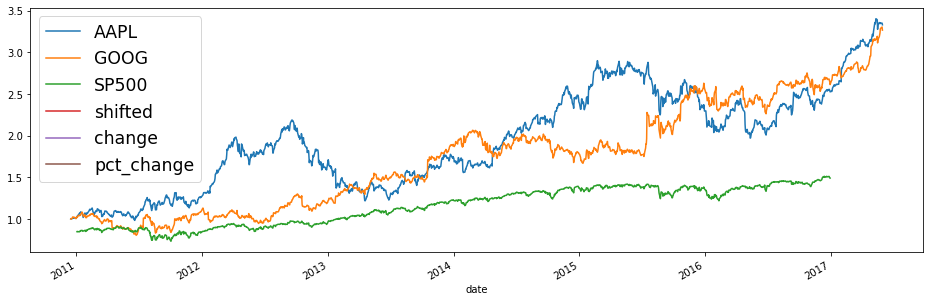

In [82]:
# Normalize SP500 dataset
normalized_sp500 = sp500.div(sp500.iloc[0])

# PLot
fig, ax = plt.subplots(figsize=(16, 5))

normalized_aapl_goog.plot(ax=ax)
normalized_sp500["2011":].plot(label="S&P500", ax=ax)

plt.legend(fontsize="xx-large");

# Apple and Google have much higher growth than other top 500 companies in the US.

In [ ]:
# 6. Window functions 

# another type of function that helps you analyze time-series data in novel ways. These are called window functions, 
# and they help you aggregate over a custom number of rows called 'windows.'

# For example, I can create a 30-day window over my Medium subscribers data to see the total number of subscribers for 
# the past 30 days on any given day. Or a restaurant owner might create a weekly window to see average sales of the 
# past week. 

In [ ]:
## 6.1 Rolling window functions
#Rolling window functions will have the same length. As they slide through the data, their coverage (number of rows 
# don't change)

In [84]:
# creating a rolling window
aapl_googl.rolling(window=5)

# Just like resample, it is in a read-only state - to use each window, we should chain some type of function. 
# For example, let's create a cumulative sum for every past 5 periods:

aapl_googl["GOOG_5d_roll"] = aapl_googl["GOOG"].rolling(window=5).sum()

print(aapl_googl.head(10))

# Obviously, the first 4 rows will be NaNs. Any other row will contain the sum of the previous 4 rows and the current one.
# Pay attention to the window argument. If you pass an integer, the window size will be determined by that number of rows.
# If you pass a frequency alias such as months, years, 5 hours, or 7 weeks, the window size will be whatever number of 
# rows that includes the single unit of the passed frequency. In other words, a 5-period window might have a different 
#size than a 5-day frequency window.

,AAPL,GOOG,GOOG_5d_roll
Date,,,
2010-12-16,45.89,295.56,NaN
2010-12-17,45.80,295.10,NaN
2010-12-20,46.03,297.23,NaN
2010-12-21,46.32,301.23,NaN
2010-12-22,46.45,302.44,1491.56
2010-12-23,46.23,301.81,1497.81
2010-12-27,46.38,300.89,1503.60
2010-12-28,46.50,299.16,1505.53
2010-12-29,46.47,300.20,1504.50


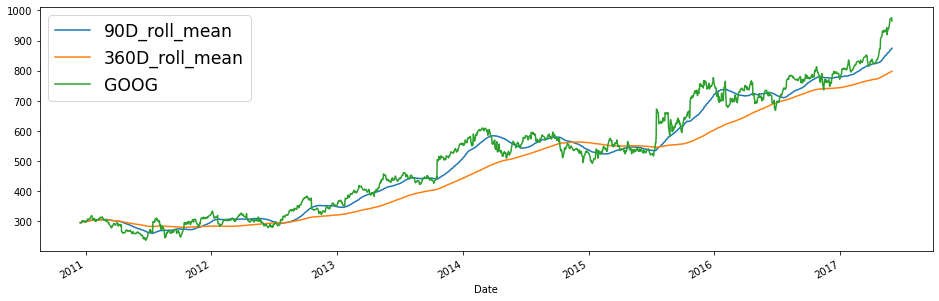

In [85]:
# plot 90 and 360-day moving averages for Google stock prices and plot them:
aapl_googl["90D_roll_mean"] = aapl_googl["GOOG"].rolling(window="90D").mean()
aapl_googl["360D_roll_mean"] = aapl_googl["GOOG"].rolling(window="360D").mean()

fig, ax = plt.subplots(figsize=(16, 5))
aapl_googl[["90D_roll_mean", "360D_roll_mean", "GOOG"]].plot(ax=ax)
plt.legend(fontsize="xx-large");

# Just like groupby and resample, you can calculate multiple metrics with the agg function for each window.

In [ ]:
# 6.2 Expanding window functions

In [88]:
# Another type of window function deals with expanding windows. Each new window will contain all the records up to the 
# current date:

# Expanding windows are useful for calculating 'running' metrics-for example, running sum, mean, min and max, running 
# rate of return, etc.

# Below, you will see how to calculate the cumulative sum. The cumulative sum is actually an expanding window function 
# with a window size of 1:

#aapl_googl.drop(["GOOG_5d_roll", "90D_roll_mean", "360D_roll_mean"], axis=1, inplace=True)

aapl_googl["expanding_cumsum"] = aapl_googl["GOOG"].expanding(min_periods=1).sum()
# The same operation with cumsum() func
aapl_googl["cumsum_function"] = aapl_googl["GOOG"].cumsum()

print(aapl_googl.head())

# expanding function has a min_periods parameter that determines the initial window size

             AAPL    GOOG  expanding_cumsum  cumsum_function
Date                                                        
2010-12-16  45.89  295.56            295.56           295.56
2010-12-17  45.80  295.10            590.66           590.66
2010-12-20  46.03  297.23            887.89           887.89
2010-12-21  46.32  301.23           1189.12          1189.12
2010-12-22  46.45  302.44           1491.56          1491.56


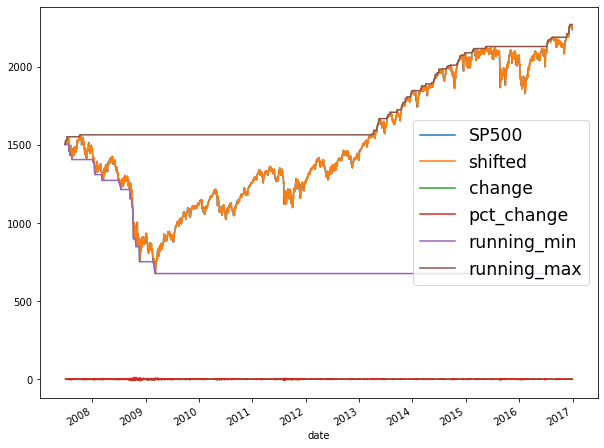

In [89]:
#  plot the running min and max of S&P500 stocks:
sp500["running_min"] = sp500["SP500"].expanding().min()  # same as cummin()
sp500["running_max"] = sp500["SP500"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 8))

sp500.plot(ax=ax)
plt.legend(fontsize="xx-large");

In [1]:
import pandas as pd

# Sample DataFrame with daily data
data = {'date': pd.date_range(start='2023-09-01', periods=3, freq='D'),
        'value': [10, 20, 30]}
df_daily = pd.DataFrame(data)

# Convert the 'date' column to the datetime data type (if not already)
df_daily['date'] = pd.to_datetime(df_daily['date'])

# Set 'date' column as the index (required for resampling)
df_daily.set_index('date', inplace=True)

# Resample the daily data to hourly frequency, filling missing values with NaN
df_hourly = df_daily.resample('H').asfreq()

# Forward-fill NaN values with the previous non-null value (copy contents)
df_hourly['value'].fillna(method='ffill', inplace=True)

# Reset the index to have 'date' as a regular column
df_hourly.reset_index(inplace=True)

# Display the resulting hourly DataFrame
print(df_hourly)


                  date  value
0  2023-09-01 00:00:00   10.0
1  2023-09-01 01:00:00   10.0
2  2023-09-01 02:00:00   10.0
3  2023-09-01 03:00:00   10.0
4  2023-09-01 04:00:00   10.0
5  2023-09-01 05:00:00   10.0
6  2023-09-01 06:00:00   10.0
7  2023-09-01 07:00:00   10.0
8  2023-09-01 08:00:00   10.0
9  2023-09-01 09:00:00   10.0
10 2023-09-01 10:00:00   10.0
11 2023-09-01 11:00:00   10.0
12 2023-09-01 12:00:00   10.0
13 2023-09-01 13:00:00   10.0
14 2023-09-01 14:00:00   10.0
15 2023-09-01 15:00:00   10.0
16 2023-09-01 16:00:00   10.0
17 2023-09-01 17:00:00   10.0
18 2023-09-01 18:00:00   10.0
19 2023-09-01 19:00:00   10.0
20 2023-09-01 20:00:00   10.0
21 2023-09-01 21:00:00   10.0
22 2023-09-01 22:00:00   10.0
23 2023-09-01 23:00:00   10.0
24 2023-09-02 00:00:00   20.0
25 2023-09-02 01:00:00   20.0
26 2023-09-02 02:00:00   20.0
27 2023-09-02 03:00:00   20.0
28 2023-09-02 04:00:00   20.0
29 2023-09-02 05:00:00   20.0
30 2023-09-02 06:00:00   20.0
31 2023-09-02 07:00:00   20.0
32 2023-09